# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
100% 235k/235k [00:00<00:00, 424kB/s]
100% 235k/235k [00:00<00:00, 424kB/s]
Archive:  traffic-dataset.zip
  inflating: Traffic Data.csv        


In [3]:
import pandas as pd
df = pd.read_csv('/content/Traffic Data.csv', parse_dates=['date_time'], index_col='date_time')
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear
...,...,...,...,...,...,...,...
2018-06-06 21:00:00,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds
2017-10-25 15:00:00,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds
2018-03-28 23:00:00,1132.0,275.30,0.0,0.0,1,Clear,sky is clear


In [4]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear


In [5]:
df.sample(5)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2018-02-09 07:00:00,6499.0,256.01,0.0,0.0,40,Clouds,scattered clouds
2017-04-14 19:00:00,3773.0,289.02,0.0,0.0,90,Drizzle,light intensity drizzle
2017-07-10 04:00:00,873.0,292.68,0.0,0.0,90,Clouds,overcast clouds
2016-12-22 16:00:00,6180.0,275.71,0.0,0.0,1,Clear,sky is clear
2017-10-13 03:00:00,342.0,284.28,0.0,0.0,1,Clear,sky is clear


In [6]:
df.tail()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2018-06-06 21:00:00,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds
2017-10-25 15:00:00,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds
2018-03-28 23:00:00,1132.0,275.30,0.0,0.0,1,Clear,sky is clear
2018-02-12 15:00:00,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds
2018-05-31 18:00:00,5042.0,301.65,0.0,0.0,40,Clouds,scattered clouds


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [7]:
df.sort_index(inplace=True)

In [8]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist
...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,Clouds,broken clouds
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,Clouds,overcast clouds
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [10]:
df.index.nunique()

16269

<Axes: xlabel='date_time'>

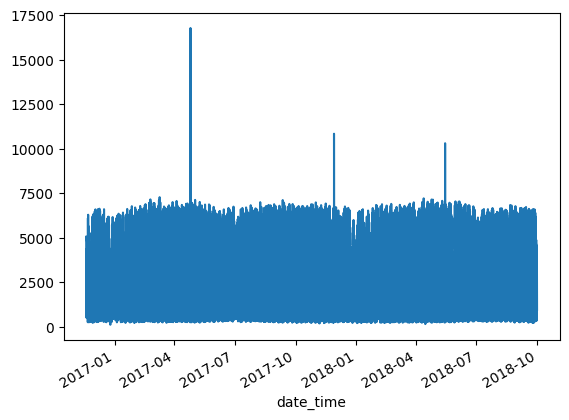

In [11]:
df['traffic_volume'].plot()

<Axes: >

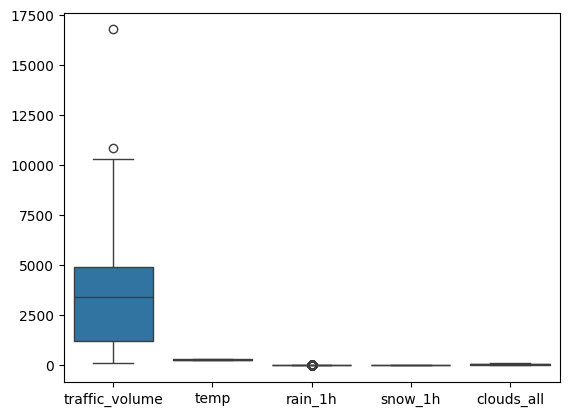

In [12]:
import seaborn as sns
sns.boxplot(df)

In [13]:
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [14]:
df['traffic_volume'].fillna(df['traffic_volume'].rolling(window=10, min_periods=1).mean(), inplace=True)

In [15]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [16]:
df.duplicated().sum()

18

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

0

<Axes: xlabel='date_time'>

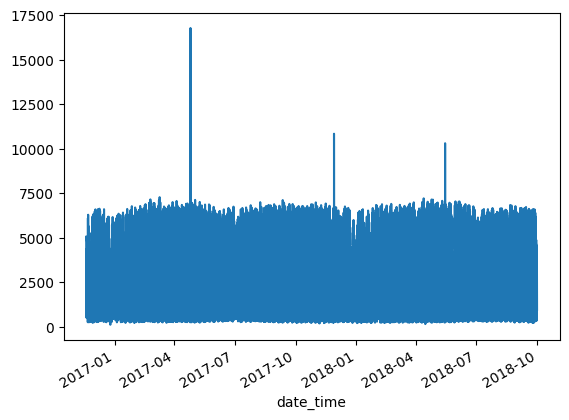

In [19]:
df['traffic_volume'].plot()

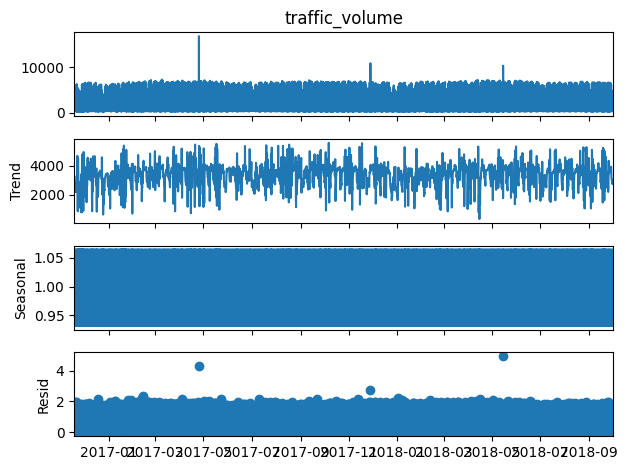

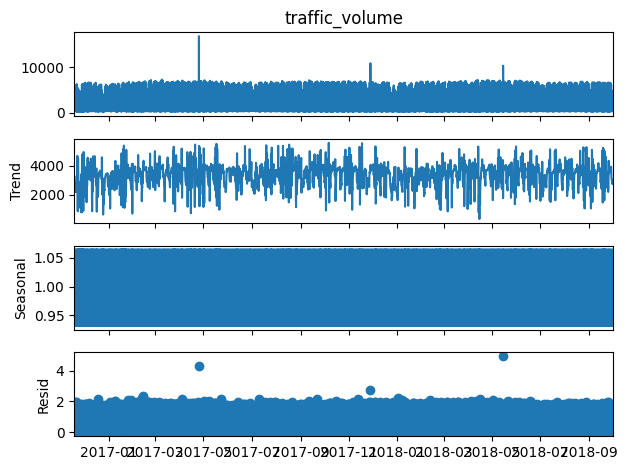

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df['traffic_volume'], model='multiplicative', period=24).plot()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [21]:
# I did most of the preprocessing above, it's requierd for seasonal_decompose to work

In [22]:
df['MA_traffic_volume'] = df['traffic_volume'].rolling(window=3).mean()
df['EMA_traffic_volume'] = df['traffic_volume'].ewm(span=3, adjust=False).mean()

In [23]:
df['MA_traffic_volume'].fillna(method='bfill', inplace=True)

<ipython-input-23-8b7c160a8fe1>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['MA_traffic_volume'].fillna(method='bfill', inplace=True)


In [24]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
MA_traffic_volume,0
EMA_traffic_volume,0


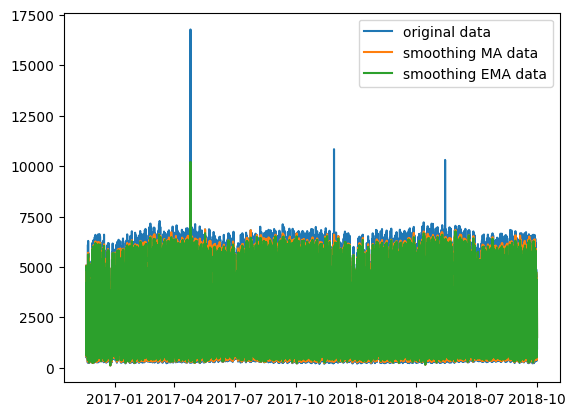

In [25]:
import matplotlib.pyplot as plt
plt.plot(df['traffic_volume'], label='original data')
plt.plot(df['MA_traffic_volume'], label='smoothing MA data')
plt.plot(df['EMA_traffic_volume'], label='smoothing EMA data')
plt.legend()
plt.show()

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [26]:
df['shift_traffic_volume'] = df['traffic_volume'].shift(1)

In [27]:
df['shift_traffic_volume']

,shift_traffic_volume
date_time,
2016-11-18 15:00:00,NaN
2016-11-18 15:00:00,4872.0
2016-11-18 15:00:00,4872.0
2016-11-18 16:00:00,4872.0
2016-11-18 16:00:00,5074.0
...,...
2018-09-30 19:00:00,3947.0
2018-09-30 20:00:00,3543.0
2018-09-30 21:00:00,2781.0


In [28]:
df['shift_traffic_volume'].fillna(method='bfill', inplace=True)
df['shift_traffic_volume']

<ipython-input-28-2c38c66b86e9>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['shift_traffic_volume'].fillna(method='bfill', inplace=True)


,shift_traffic_volume
date_time,
2016-11-18 15:00:00,4872.0
2016-11-18 15:00:00,4872.0
2016-11-18 15:00:00,4872.0
2016-11-18 16:00:00,4872.0
2016-11-18 16:00:00,5074.0
...,...
2018-09-30 19:00:00,3947.0
2018-09-30 20:00:00,3543.0
2018-09-30 21:00:00,2781.0


In [29]:
df['diff_traffic_volume'] = df['traffic_volume'].diff()
df['diff_traffic_volume']

,diff_traffic_volume
date_time,
2016-11-18 15:00:00,NaN
2016-11-18 15:00:00,0.0
2016-11-18 15:00:00,0.0
2016-11-18 16:00:00,202.0
2016-11-18 16:00:00,0.0
...,...
2018-09-30 19:00:00,-404.0
2018-09-30 20:00:00,-762.0
2018-09-30 21:00:00,-622.0


In [30]:
df['Day of the week'] = df.index.dayofweek
df['Month'] = df.index.month
df['Day of the year'] = df.index.dayofyear
df['isWeekend'] = df.index.dayofweek >=5
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,MA_traffic_volume,EMA_traffic_volume,shift_traffic_volume,diff_traffic_volume,Day of the week,Month,Day of the year,isWeekend
date_time,,,,,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,4872.000000,4872.000000,4872.0,NaN,4,11,323,False
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,4872.000000,4872.000000,4872.0,0.0,4,11,323,False
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist,4872.000000,4872.000000,4872.0,0.0,4,11,323,False
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,4939.333333,4973.000000,4872.0,202.0,4,11,323,False
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,5006.666667,5023.500000,5074.0,0.0,4,11,323,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,Clouds,broken clouds,3874.000000,3812.038353,3947.0,-404.0,6,9,273,True
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,Clouds,overcast clouds,3423.666667,3296.519177,3543.0,-762.0,6,9,273,True
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2827.666667,2727.759588,2781.0,-622.0,6,9,273,True


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [31]:
df.index

DatetimeIndex(['2016-11-18 15:00:00', '2016-11-18 15:00:00',
               '2016-11-18 15:00:00', '2016-11-18 16:00:00',
               '2016-11-18 16:00:00', '2016-11-18 16:00:00',
               '2016-11-18 17:00:00', '2016-11-18 17:00:00',
               '2016-11-18 17:00:00', '2016-11-18 18:00:00',
               ...
               '2018-09-30 15:00:00', '2018-09-30 15:00:00',
               '2018-09-30 16:00:00', '2018-09-30 17:00:00',
               '2018-09-30 18:00:00', '2018-09-30 19:00:00',
               '2018-09-30 20:00:00', '2018-09-30 21:00:00',
               '2018-09-30 22:00:00', '2018-09-30 23:00:00'],
              dtype='datetime64[ns]', name='date_time', length=19982, freq=None)

In [32]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,MA_traffic_volume,EMA_traffic_volume,shift_traffic_volume,diff_traffic_volume,Day of the week,Month,Day of the year,isWeekend
date_time,,,,,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,4872.000000,4872.000000,4872.0,NaN,4,11,323,False
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,4872.000000,4872.000000,4872.0,0.0,4,11,323,False
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist,4872.000000,4872.000000,4872.0,0.0,4,11,323,False
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,4939.333333,4973.000000,4872.0,202.0,4,11,323,False
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,5006.666667,5023.500000,5074.0,0.0,4,11,323,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,Clouds,broken clouds,3874.000000,3812.038353,3947.0,-404.0,6,9,273,True
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,Clouds,overcast clouds,3423.666667,3296.519177,3543.0,-762.0,6,9,273,True
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2827.666667,2727.759588,2781.0,-622.0,6,9,273,True


In [33]:
df.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'MA_traffic_volume',
       'EMA_traffic_volume', 'shift_traffic_volume', 'diff_traffic_volume',
       'Day of the week', 'Month', 'Day of the year', 'isWeekend'],
      dtype='object')

In [34]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

train_ohe = ohe.fit_transform(df.select_dtypes(include='object'))
val_ohe = ohe.transform(df.select_dtypes(include='object'))
test_ohe = ohe.transform(df.select_dtypes(include='object'))
train_ohe

<19982x44 sparse matrix of type '<class 'numpy.float64'>'
	with 39964 stored elements in Compressed Sparse Row format>

In [35]:
df_ch = df[['temp', 'rain_1h', 'clouds_all', 'MA_traffic_volume']]

In [36]:
train_pr = df_ch.loc['2016-11-18 15:00:00':'2017-12-31 23:00:00']
val_pr = df_ch.loc['2018-1-1 01:00:00':'2018-05-31 23:00:00']
test_pr = df_ch.loc['2018-06-01 01:00:00':'2018-09-30 23:00:00']
train_pr, val_pr, test_pr

(                       temp  rain_1h  clouds_all  MA_traffic_volume
 date_time                                                          
 2016-11-18 15:00:00  274.08      0.0          90        4872.000000
 2016-11-18 15:00:00  274.08      0.0          90        4872.000000
 2016-11-18 15:00:00  274.08      0.0          90        4872.000000
 2016-11-18 16:00:00  273.84      0.0          90        4939.333333
 2016-11-18 16:00:00  273.84      0.0          90        5006.666667
 ...                     ...      ...         ...                ...
 2017-12-31 19:00:00  249.84      0.0           1        3286.000000
 2017-12-31 20:00:00  249.79      0.0           5        3025.333333
 2017-12-31 21:00:00  249.61      0.0           5        2736.333333
 2017-12-31 22:00:00  249.50      0.0           1        2418.333333
 2017-12-31 23:00:00  249.45      0.0           1        2034.666667
 
 [12037 rows x 4 columns],
                        temp  rain_1h  clouds_all  MA_traffic_volume
 date

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [38]:
train_scaled = scaler.fit_transform(train_pr.select_dtypes(include='number'))
val_scaled = scaler.transform(val_pr.select_dtypes(include='number'))
test_scaled = scaler.transform(test_pr.select_dtypes(include='number'))
train_scaled

array([[0.48231966, 0.        , 0.97826087, 0.4832944 ],
       [0.48231966, 0.        , 0.97826087, 0.4832944 ],
       [0.48231966, 0.        , 0.97826087, 0.4832944 ],
       ...,
       [0.09775263, 0.        , 0.05434783, 0.2664094 ],
       [0.09602389, 0.        , 0.01086957, 0.2341153 ],
       [0.0952381 , 0.        , 0.01086957, 0.1951525 ]])

In [39]:
train_df= pd.DataFrame(train_scaled, columns=train_pr.columns)
val_df= pd.DataFrame(val_scaled, columns=val_pr.columns)
test_df= pd.DataFrame(test_scaled, columns=test_pr.columns)
train_df

,temp,rain_1h,clouds_all,MA_traffic_volume
0,0.482320,0.0,0.978261,0.483294
1,0.482320,0.0,0.978261,0.483294
2,0.482320,0.0,0.978261,0.483294
3,0.478548,0.0,0.978261,0.490132
4,0.478548,0.0,0.978261,0.496970
...,...,...,...,...
12032,0.101367,0.0,0.010870,0.322230
12033,0.100581,0.0,0.054348,0.295758
12034,0.097753,0.0,0.054348,0.266409
12035,0.096024,0.0,0.010870,0.234115


In [40]:
train_df.iloc[:, -1]

,MA_traffic_volume
0,0.483294
1,0.483294
2,0.483294
3,0.490132
4,0.496970
...,...
12032,0.322230
12033,0.295758
12034,0.266409
12035,0.234115


In [41]:
import tensorflow as tf
from tensorflow.keras.utils import timeseries_dataset_from_array

In [42]:
wen = 24
xy_train = timeseries_dataset_from_array(train_df,train_df.iloc[wen:, -1], sequence_length = wen)
xy_val = timeseries_dataset_from_array(val_df, val_df.iloc[wen:, -1], sequence_length = wen)
xy_test = timeseries_dataset_from_array(test_df,test_df.iloc[wen:, -1], sequence_length = wen)

In [43]:
import numpy as np

x_test = []
y_test = []

for batch in xy_test:
  x,y =batch
  x_test.append(x.numpy())
  y_test.append(y.numpy())

x_test = np.concatenate(x_test, axis=0)
y_test = np.concatenate(y_test, axis=0)
x_test, y_test

(array([[[0.78312117, 0.        , 0.01086957, 0.08090451],
         [0.76740531, 0.        , 0.01086957, 0.04366812],
         [0.75498978, 0.        , 0.01086957, 0.03043228],
         ...,
         [0.79333648, 0.        , 0.05434783, 0.32128229],
         [0.77306302, 0.        , 0.01086957, 0.27971294],
         [0.75404683, 0.        , 0.01086957, 0.21478623]],
 
        [[0.76740531, 0.        , 0.01086957, 0.04366812],
         [0.75498978, 0.        , 0.01086957, 0.03043228],
         [0.75058934, 0.        , 0.01086957, 0.0431265 ],
         ...,
         [0.77306302, 0.        , 0.01086957, 0.27971294],
         [0.75404683, 0.        , 0.01086957, 0.21478623],
         [0.73723087, 0.        , 0.01086957, 0.14589892]],
 
        [[0.75498978, 0.        , 0.01086957, 0.03043228],
         [0.75058934, 0.        , 0.01086957, 0.0431265 ],
         [0.74540311, 0.        , 0.01086957, 0.13178295],
         ...,
         [0.75404683, 0.        , 0.01086957, 0.21478623],
        

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D
from tensorflow.keras.optimizers import Adam

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [45]:
gru_model = Sequential([
    GRU(50, activation='tanh', return_sequences = True),
    GRU(50, activation='tanh', return_sequences = True),
    GRU(50, activation='tanh', return_sequences = True),
    GRU(50, activation='tanh'),

    Dense(20, activation = 'relu'),
    Dense(1, activation = 'relu')
])
gru_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
gru_model.compile(loss='mse', optimizer = Adam(learning_rate=0.0001), metrics=['mse'])

In [47]:
gru_call = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Week5 Task/best_gru.keras', monitor='val_loss', save_best_only=True)

In [48]:
gru_hist = gru_model.fit(xy_train, epochs =15, validation_data=xy_val, callbacks=[gru_call])

Epoch 1/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0558 - mse: 0.0558 - val_loss: 0.0327 - val_mse: 0.0327
Epoch 2/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0278 - mse: 0.0278 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 3/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0184 - val_mse: 0.0184
Epoch 4/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 5/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 6/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 7/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0088 - val_mse: 0.0088
Epoch 8/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 9/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.006

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [49]:
gru_pred = gru_model.predict(x_test)
gru_pred

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([[0.13191292],
       [0.07171965],
       [0.02797066],
       ...,
       [0.28351453],
       [0.20565684],
       [0.1217596 ]], dtype=float32)

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [50]:
gru_model.evaluate(xy_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0052 - mse: 0.0052


[0.010848985984921455, 0.010848985984921455]

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print('mean_absolute_error', mean_absolute_error(y_test, gru_pred))
print('mean_squared_error', mean_squared_error(y_test, gru_pred))
print('root_mean_absolute_error', np.sqrt(mean_absolute_error(y_test, gru_pred)))
print('mean_absolute_percentage_error', mean_absolute_percentage_error(y_test, gru_pred))

mean_absolute_error 0.06235710341699867
mean_squared_error 0.010848985047706044
root_mean_absolute_error 0.24971404329151908
mean_absolute_percentage_error 0.26983793186553695


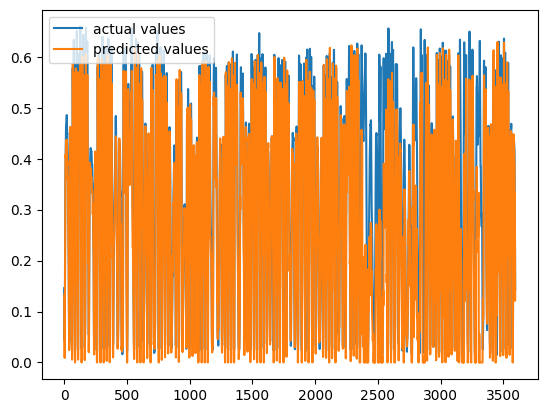

In [65]:
plt.plot(y_test, label='actual values')
plt.plot(gru_pred, label='predicted values')
plt.legend()
plt.show()

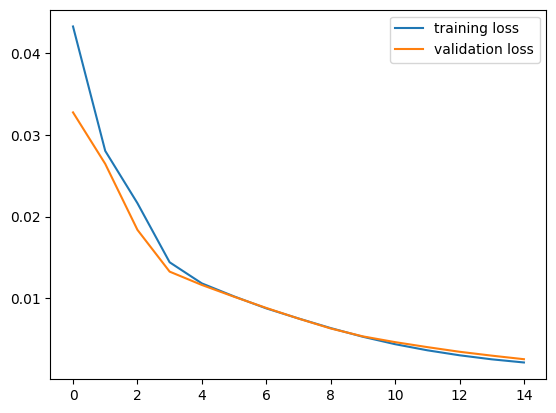

In [53]:
plt.plot(gru_hist.history['loss'], label='training loss')
plt.plot(gru_hist.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [54]:
lstm_model = Sequential([
    LSTM(50, activation='tanh', return_sequences = True),
    LSTM(50, activation='tanh', return_sequences = True),
    LSTM(50, activation='tanh', return_sequences = True),
    LSTM(50, activation='tanh'),

    Dense(20, activation = 'relu'),
    Dense(1, activation = 'relu')
])
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [55]:
lstm_model.compile(loss='mse', optimizer = Adam(learning_rate=0.0001), metrics=['mse'])

In [56]:
lstm_call = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Week5 Task/best_lstm.keras', monitor='val_loss', save_best_only=True)

In [57]:
lstm_hist = lstm_model.fit(xy_train, epochs =15, validation_data=xy_val, callbacks=[lstm_call])

Epoch 1/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0661 - mse: 0.0661 - val_loss: 0.0419 - val_mse: 0.0419
Epoch 2/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0406 - val_mse: 0.0406
Epoch 3/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0362 - mse: 0.0362 - val_loss: 0.0388 - val_mse: 0.0388
Epoch 4/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0353 - mse: 0.0353 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 5/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0343 - mse: 0.0343 - val_loss: 0.0334 - val_mse: 0.0334
Epoch 6/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0329 - mse: 0.0329 - val_loss: 0.0304 - val_mse: 0.0304
Epoch 7/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0312 - mse: 0.0312 - val_loss: 0.0279 - val_mse: 0.0279
Epoch 8/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0252 - val_mse: 0.0252
Epoch 9/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.026

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [58]:
lstm_pred = lstm_model.predict(x_test)
lstm_pred

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


array([[0.06283032],
       [0.00855911],
       [0.        ],
       ...,
       [0.3805553 ],
       [0.34755757],
       [0.30755678]], dtype=float32)

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [59]:
lstm_model.evaluate(xy_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0215 - mse: 0.0215


[0.023761242628097534, 0.023761242628097534]

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print('mean_absolute_error', mean_absolute_error(y_test, lstm_pred))
print('mean_squared_error', mean_squared_error(y_test, lstm_pred))
print('root_mean_absolute_error', np.sqrt(mean_absolute_error(y_test, lstm_pred)))
print('mean_absolute_percentage_error', mean_absolute_percentage_error(y_test, lstm_pred))

mean_absolute_error 0.11751314422356002
mean_squared_error 0.02376124563354857
root_mean_absolute_error 0.34280190230446506
mean_absolute_percentage_error 1.0388732196138737


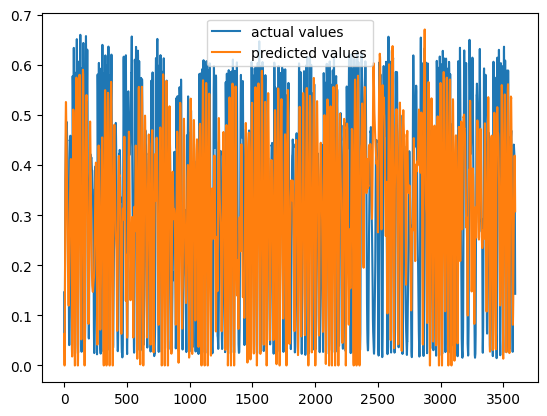

In [61]:
plt.plot(y_test, label='actual values')
plt.plot(lstm_pred, label='predicted values')
plt.legend()
plt.show()

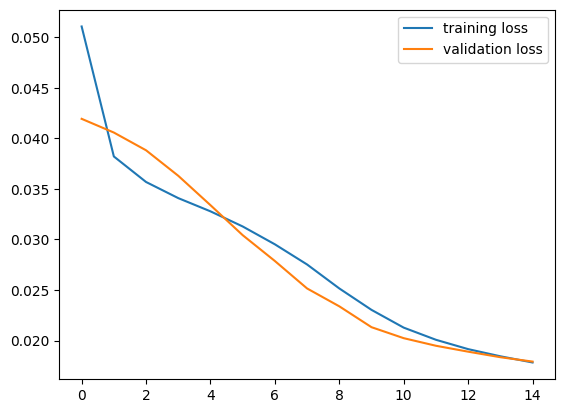

In [62]:
plt.plot(lstm_hist.history['loss'], label='training loss')
plt.plot(lstm_hist.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

### Model 3 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [71]:
conv_gru_model = Sequential([
    Conv1D(32, kernel_size= 3, activation='relu'),
    GRU(50, activation='tanh', return_sequences = True),
    GRU(50, activation='tanh', return_sequences = True),
    GRU(50, activation='tanh', return_sequences = True),
    GRU(50, activation='tanh'),

    Dense(20, activation = 'relu'),
    Dense(1, activation = 'relu')
])
conv_gru_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_4 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_6 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_7 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [72]:
conv_gru_model.compile(loss='mse', optimizer = Adam(learning_rate=0.0001), metrics=['mse'])

In [73]:
conv_gru_call = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Week5 Task/best_conv_gru.keras', monitor='val_loss', save_best_only=True)

In [74]:
conv_gru_hist = conv_gru_model.fit(xy_train, epochs =15, validation_data=xy_val, callbacks=[conv_gru_call])

Epoch 1/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0451 - mse: 0.0451 - val_loss: 0.0338 - val_mse: 0.0338
Epoch 2/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0293 - mse: 0.0293 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 3/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 4/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 5/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 6/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 7/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 8/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 9/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.009

### Make 3 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [75]:
conv_gru_pred = conv_gru_model.predict(x_test)
conv_gru_pred

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


array([[0.12105774],
       [0.0616277 ],
       [0.02104359],
       ...,
       [0.1927545 ],
       [0.21449994],
       [0.16469409]], dtype=float32)

### Model 3 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [77]:
conv_gru_model.evaluate(xy_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0067 - mse: 0.0067


[0.013773648999631405, 0.013773648999631405]

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print('mean_absolute_error', mean_absolute_error(y_test, conv_gru_pred))
print('mean_squared_error', mean_squared_error(y_test, conv_gru_pred))
print('root_mean_absolute_error', np.sqrt(mean_absolute_error(y_test, conv_gru_pred)))
print('mean_absolute_percentage_error', mean_absolute_percentage_error(y_test, conv_gru_pred))

mean_absolute_error 0.07253152022609428
mean_squared_error 0.013773649136862106
root_mean_absolute_error 0.2693167655867237
mean_absolute_percentage_error 0.5137711640441411


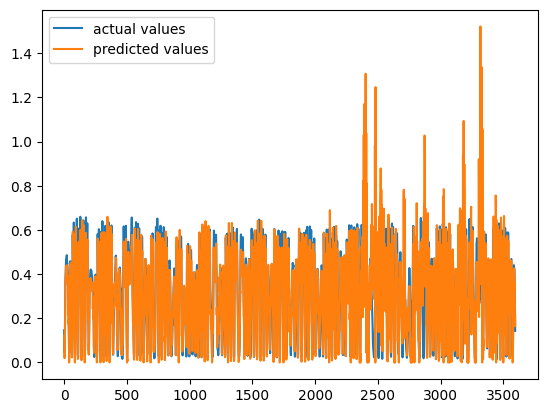

In [79]:
plt.plot(y_test, label='actual values')
plt.plot(conv_gru_pred, label='predicted values')
plt.legend()
plt.show()

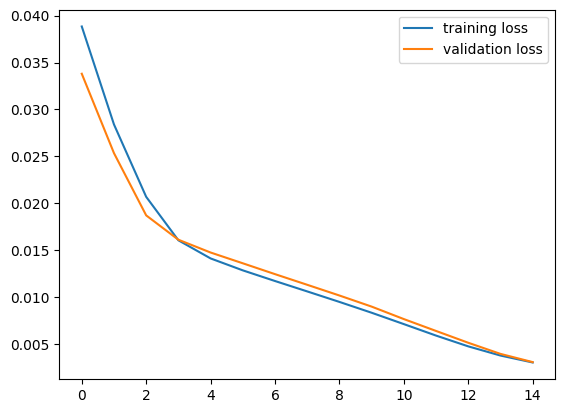

In [80]:
plt.plot(conv_gru_hist.history['loss'], label='training loss')
plt.plot(conv_gru_hist.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

**The three models in comparison**

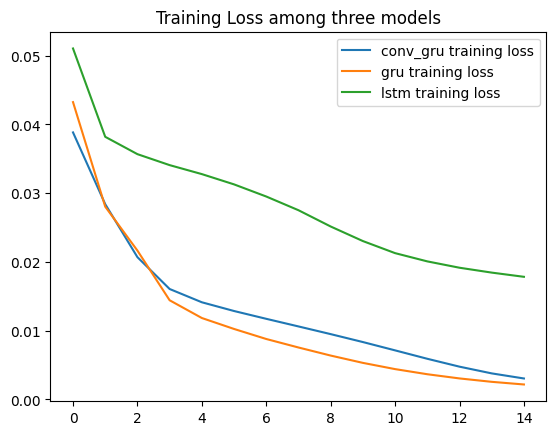

In [81]:
plt.plot(conv_gru_hist.history['loss'], label='conv_gru training loss')
plt.plot(gru_hist.history['loss'], label='gru training loss')
plt.plot(lstm_hist.history['loss'], label='lstm training loss')
plt.title('Training Loss among three models')
plt.legend()
plt.show()

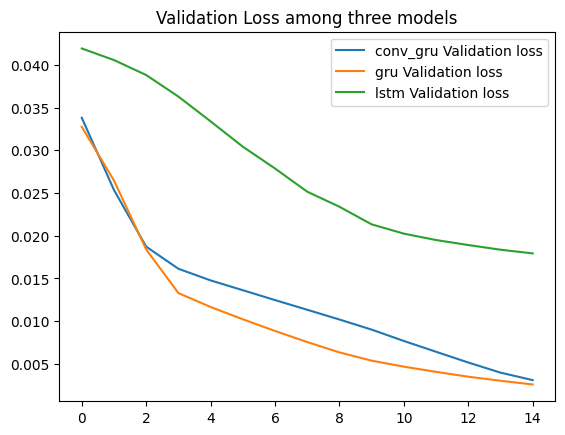

In [82]:
plt.plot(conv_gru_hist.history['val_loss'], label='conv_gru Validation loss')
plt.plot(gru_hist.history['val_loss'], label='gru Validation loss')
plt.plot(lstm_hist.history['val_loss'], label='lstm Validation loss')
plt.title('Validation Loss among three models')
plt.legend()

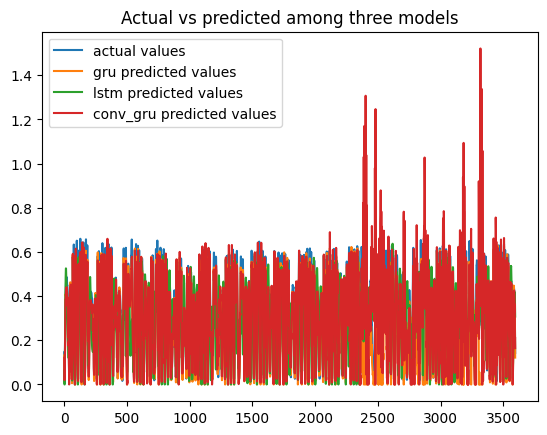

In [83]:
plt.plot(y_test, label='actual values')
plt.plot(gru_pred, label='gru predicted values')
plt.plot(lstm_pred, label='lstm predicted values')
plt.plot(conv_gru_pred, label='conv_gru predicted values')
plt.title('Actual vs predicted among three models')
plt.legend()
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:
Data preprocessing includes:

1. prsing date as an index
2. filling messing values with moving average
3. deleting duplicates
4. sorting data to be sequential
5. selected only number features for better model performens(i figure that when i was practicing for the Task).

Feture Engineering includes:
1. making new smoothing columns for 'traffic_volume' using MA and EMA
2. makeing multiple dates columns(ex.. day of week, day of year).

Model Architecture includes:

GRU, LSTM and Conv GRU models for the same hyperparameters for comparison with 4 layers for each model with 1 dense layer and an output layer(Conv1D layer for Conv Gru model).

Training Process includes:

also the same hyperparmeters for comparison with 15 epoch and adam optimizer with 0.0001 learning rate,

Loss Function and Metrics includes:
mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, root_mean_absolute_error with GRU outpreforming LSTM and Conv Gru in metrics.

no model tunning needed

no overfitting, underfitting occured in Conv GRU and LSTM,

Future Improvements:

collectiong more data to improve model performes in more tim intervals
